In [2]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [3]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(1234)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos', 'tangalle', 'alvaraes', 'be

In [4]:
# Compile weather data using OpenWeatherMap api
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build url to send request
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Increment count
    record_count += 1

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set 1 | hammerfest
Processing Record 24 of

In [7]:
# Convert to dataframe & Export to CSV
city_data_df = pd.DataFrame(city_data)
print(city_data_df.count())
city_data_df.head()

city_data_df.to_csv("cities.csv", index_label="City_ID")

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [8]:
# Read back data & check dataframe
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.22,80,100,6.26,PN,1731264420
1,jinghong,21.9910,100.7341,18.47,94,7,1.22,CN,1731264421
2,taulaga,-11.0553,-171.0883,28.65,73,94,7.82,AS,1731264422
3,bethel,41.3712,-73.4140,14.56,45,0,5.14,US,1731264423
4,gaspe,48.8334,-64.4819,7.12,42,20,4.12,CA,1731264424


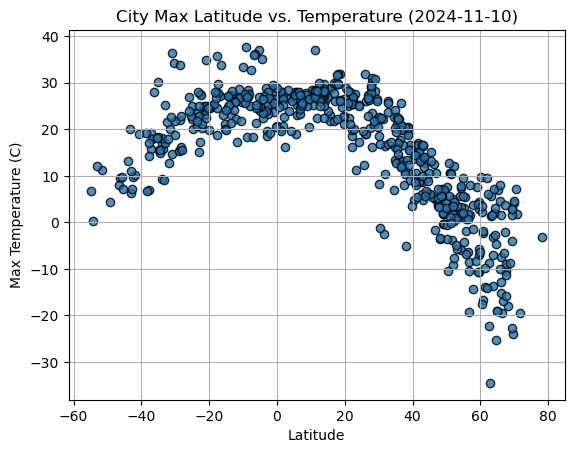

The above chart plots the max temperatures recorded at the different cities pulled from the Weather API; based on the relationship,those closest to the equator tend to have the highest max temperature; Those closest to the North Pole tend to have the lowest max temperatures


In [12]:
# Scatterplot with latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Define Axes and title
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save & show
plt.savefig("Temp_vs_Lat.png")
plt.show()
print("The above chart plots the max temperatures recorded at the different cities pulled from the Weather API; based on the relationship,those closest to the equator tend to have the highest max temperature; Those closest to the North Pole tend to have the lowest max temperatures")

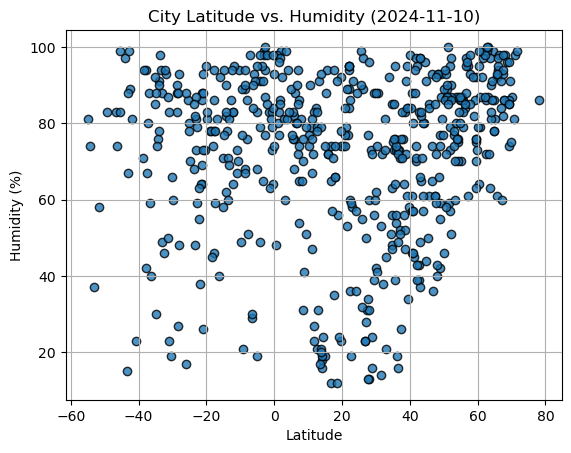

The above scatterplot aims to show the relationship between recorded humidity % and latitude in the mapped locations. There appears to be less of a relationship here, with the majority of locations across latitudes falling above 60% humidity


In [14]:
# Scatterplot with latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save & Show
plt.savefig("Humidity_vs_Lat.png")
plt.show()
print("The above scatterplot aims to show the relationship between recorded humidity % and latitude in the mapped locations. There appears to be less of a relationship here, with the majority of locations across latitudes falling above 60% humidity")

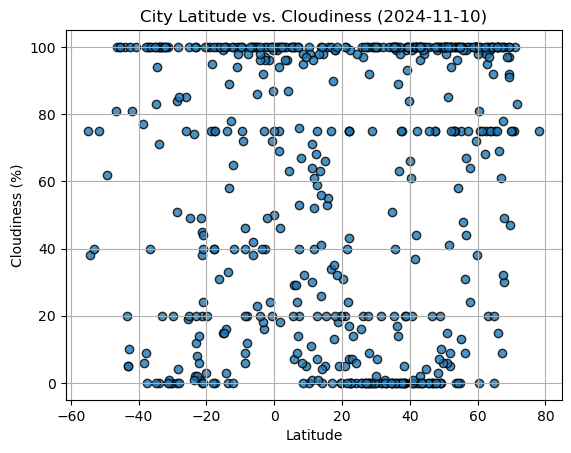

The above chart aims to show the relationship between latitudes and cloud cover (shown in percent). Nearly all recorded latitudes have at least 1 location falling in 100% cloud cover. There does appear to be a cluster of locations falling in the 20-50 degree latitudes which have 0% cloud cover, which could potentially indicate that locations falling in that range have a higher chance of cloudless weather. However, this cannot be proved without statistical tests


In [16]:
# Scatterplot showing Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save & show
plt.savefig("Cloudiness_vs_Lat.png")
plt.show()
print("The above chart aims to show the relationship between latitudes and cloud cover (shown in percent). Nearly all recorded latitudes have at least 1 location falling in 100% cloud cover. There does appear to be a cluster of locations falling in the 20-50 degree latitudes which have 0% cloud cover, which could potentially indicate that locations falling in that range have a higher chance of cloudless weather. However, this cannot be proved without statistical tests")

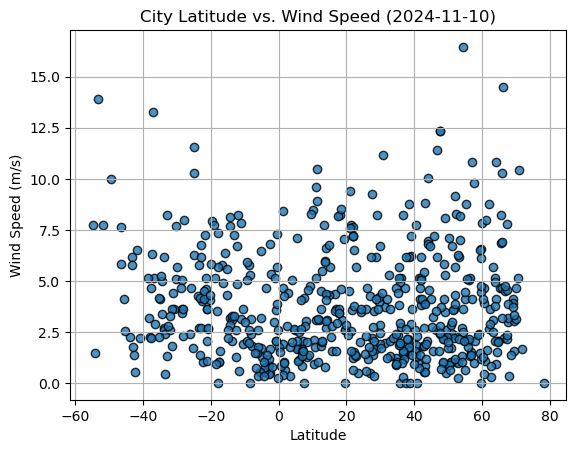

The above chart displays average wind speed by latitude on today's date. While there does not appear to be a relationship with latitude, it does appear that over half of locations have less than 5m/s wind speeds today.


In [18]:
# Scatterplot with Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & Show
plt.savefig("Windspeed_vs_Lat.png")
plt.show()
print("The above chart displays average wind speed by latitude on today's date. While there does not appear to be a relationship with latitude, it does appear that over half of locations have less than 5m/s wind speeds today.") 

In [23]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,18.47,94,7,1.22,CN,1731264421
3,bethel,41.3712,-73.4140,14.56,45,0,5.14,US,1731264423
4,gaspe,48.8334,-64.4819,7.12,42,20,4.12,CA,1731264424
5,constantia,44.1833,28.6500,6.38,80,98,6.95,RO,1731264261
7,berezovyy,51.6667,135.7000,-3.84,59,41,3.62,RU,1731264427


In [28]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.22,80,100,6.26,PN,1731264420
2,taulaga,-11.0553,-171.0883,28.65,73,94,7.82,AS,1731264422
6,tsiombe,-25.3000,45.4833,22.89,86,19,1.73,MG,1731264426
9,port mathurin,-19.6833,63.4167,24.53,81,100,7.93,MU,1731264430
10,abepura,-2.6333,140.5833,24.45,94,40,0.51,ID,1731264431


The r-value is: 0.7346596176100825


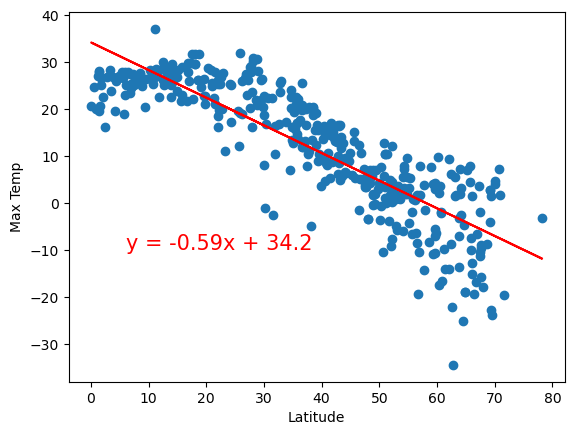

The above chart shows a potential negative relationship between latitude and max temperature in the northern hemisphere, showing that the higher in the hemisphere you go, from equator to north pole, temperature tends to go down


In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))
print("The above chart shows a potential negative relationship between latitude and max temperature in the northern hemisphere, showing that the higher in the hemisphere you go, from equator to north pole, temperature tends to go down")

The r-value is: 0.46308297713918545


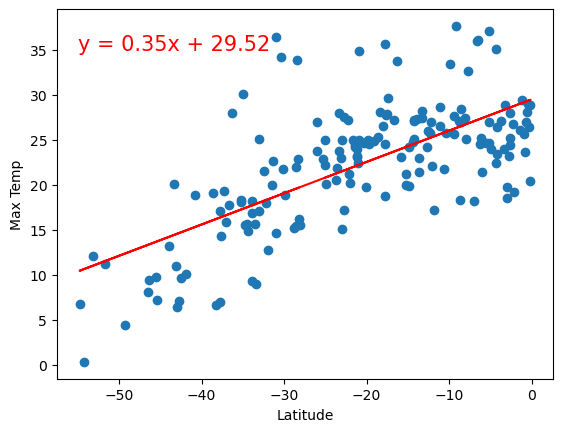

The above chart shows a potentially positive relationship between latitude and max temperature in the southern hempisphere, showing that the more north you go heading towards the equator, the higher the max temp tends to be. However, there is a lower R-square than the northern hemisphere, so this relationship is not as strong


In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))
print("The above chart shows a potentially positive relationship between latitude and max temperature in the southern hempisphere, showing that the more north you go heading towards the equator, the higher the max temp tends to be. However, there is a lower R-square than the northern hemisphere, so this relationship is not as strong")

The r-value is: 0.07582565270569906


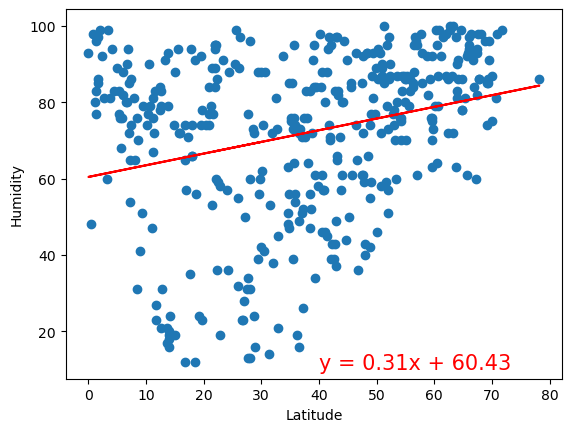

The low R-square in this chart indicates a minimal relationship between latitude and humidity in the northern hemisphere, however it is slightly stronger than the relationship in the southern hemisphere


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))
print("The low R-square in this chart indicates a minimal relationship between latitude and humidity in the northern hemisphere, however it is slightly stronger than the relationship in the southern hemisphere")

The r-value is: 0.01504378052052582


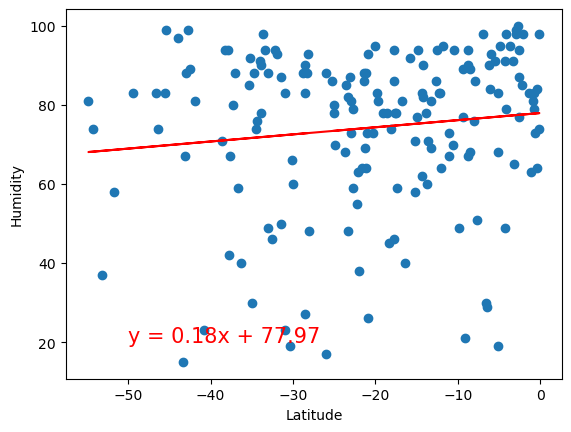

The low R-Square in this plot indicates a minimal relationship between humidity and latitude in the southern hemisphere


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))
print("The low R-Square in this plot indicates a minimal relationship between humidity and latitude in the southern hemisphere")

The r-value is: 0.04255459052921271


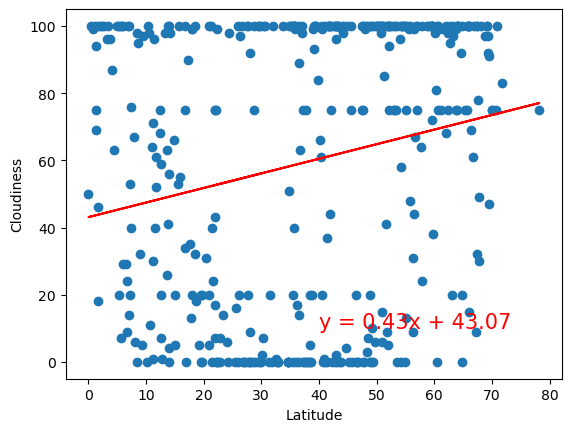

The low R-Square indicates no relationship between latitude and cloudiness in the northern hemisphere


In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))
print("The low R-Square indicates no relationship between latitude and cloudiness in the northern hemisphere")

The r-value is: 0.007661388848334516


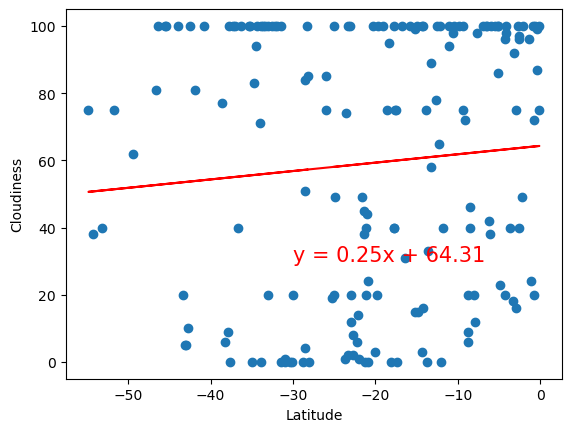

The low R-Square indicates no relationship between latitude and cloudiness in the southern hemisphere


In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))
print("The low R-Square indicates no relationship between latitude and cloudiness in the southern hemisphere")

The r-value is: 0.006758106843256739


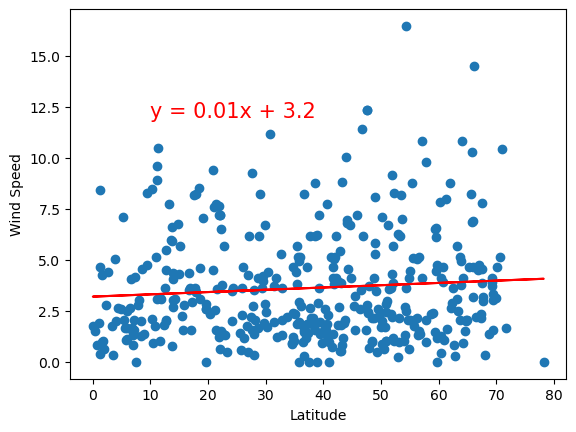

The low R-Square indicates a minimal relationship between latitude and wind speed in the northern hemisphere


In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))
print("The low R-Square indicates a minimal relationship between latitude and wind speed in the northern hemisphere")

The r-value is: 0.09539819384508455


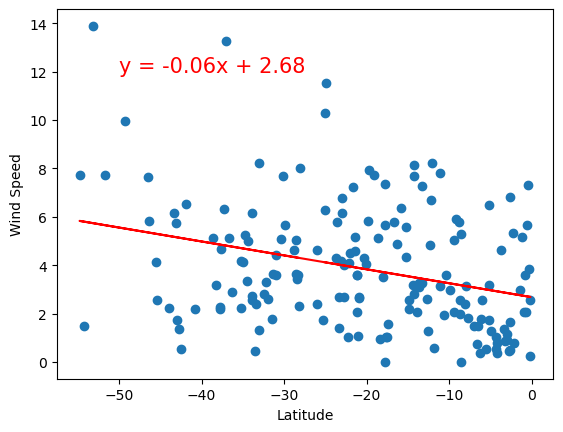

The low R-Square indicates a minimal relationship between latitude and wind speed in the northern hemisphere


In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))
print("The low R-Square indicates a minimal relationship between latitude and wind speed in the northern hemisphere")

In [51]:
print("The results of this analysis indicate that latitude has the highest impact on temperature across weather variables, and will be the most controllable variable when deciding a vacation destination")

The results of this analysis indicate that latitude has the highest impact on temperature across weather variables, and will be the most controllable variable when deciding a vacation destination
